# Represented population groups

This analysis aimed to determine which African population groups were represented in the genetic datasets and what the distribution of sample sizes within each population group was. For this analysis, a sample is defined as an individual from which genomic data was obtained.

To achieve this, the following steps were performed: 

1. Data Preparation: Population data for the samples was compiled and prepared for analysis according to the `Notebooks/Data preparation/1-Sample_populations.ipynb` Jupyter notebook. This Jupyter notebook also contains more information on the data. The compiled data is stored in `Data\Processed\Sample_populations.csv`.
2. Data Filtering: Remove data that is not necessary for this analysis
3. Data Grouping: Sample population data from `Data\Processed\Sample_populations.csv` was grouped by ethnolinguistic classification and region. 
4. Data Visualisation: A bar plot was constructed to visualise the sample counts per population group. Additionally, the regional distribution of samples was visualised using a pie chart.

## Imports

Notebook setup

In [1]:
import os
import sys

from dotenv import load_dotenv

load_dotenv()

PROJECT_ROOT = os.getenv("PROJECT_ROOT")
if PROJECT_ROOT not in sys.path:
    os.chdir(PROJECT_ROOT + "/Notebooks")
    sys.path.append(PROJECT_ROOT)

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import Utils.constants as constants
import Utils.functions as functions

Import sample population data

In [2]:
sample_subpopulations = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "Sample_populations.csv",
    )
).drop(columns="Unnamed: 0")

sample_subpopulations.tail(5)

,SUB,SAMPLE_NAME,REG
984,African American,NA20412,ASW
985,Mandenka,SS6004470,WA
986,Mbuti Pygmy,SS6004471,CA
987,San,SS6004473,SA
988,HGDP Yoruba,SS6004475,WA


## Data filtering

Remove African American and Caribbean samples

In [3]:
sample_subpopulations_filtered = sample_subpopulations[
    ~((sample_subpopulations.REG == "ACB") | (sample_subpopulations.REG == "ASW"))
]

## Data grouping
Group data by sample ethnolinguistic classification (subpopulation) group

In [4]:
grouped_sample_subpopulations = (
    functions.group_and_count(sample_subpopulations_filtered, ["SUB"])
    .reset_index()
    .rename(columns={"SAMPLE_NAME": "SAMPLE_COUNT"})
    .drop(columns="REG")
)
grouped_sample_subpopulations["REG"] = grouped_sample_subpopulations["SUB"].map(
    constants.REGIONAL_CLASSIFICATION
)
grouped_sample_subpopulations.head(5)

,SUB,SAMPLE_COUNT,REG
0,1000G Yoruba,175,WA
1,Bantu Kenya,12,EA
2,Bantu South Africa,8,SA
3,Biaka Pygmy,26,CA
4,Esan,148,WA


Group sample data by regional classification

In [5]:
grouped_regions = (
    grouped_sample_subpopulations.groupby("REG").sum(numeric_only=True).reset_index()
)
grouped_regions

,REG,SAMPLE_COUNT
0,CA,40
1,EA,109
2,SA,14
3,WA,641


## Data visualisation

Set plot parameters

In [6]:
# Set plot figure area and font size
sns.set(rc={"figure.figsize": (10, 8)})

plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.MEDIUM_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

Construct a horizontal barplot of sample counts per subpopulation, colour coded by regional classification

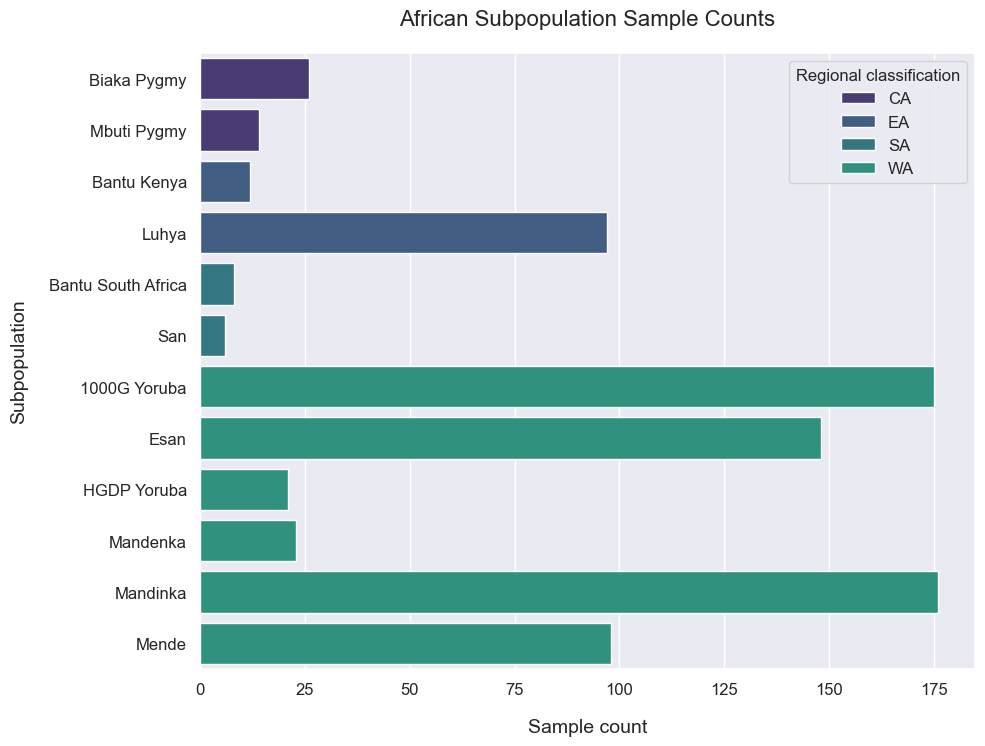

In [13]:
# Define a custom colour palette for plot
custom_palette = sns.color_palette("viridis")

# Construct barplot
variant_barplot = functions.create_plot(
    plot_type="barplot",
    x="SAMPLE_COUNT",
    y="SUB",
    palette=custom_palette,
    data=grouped_sample_subpopulations.sort_values("REG"),
    hue="REG",
    order=grouped_sample_subpopulations.sort_values("REG").SUB,
    dodge=False,
)

plt.xlabel(xlabel="Sample count", labelpad=15)
plt.ylabel(ylabel="Subpopulation", labelpad=15)
plt.legend(title="Regional classification", loc="upper right")
plt.title("African Subpopulation Sample Counts", size=constants.LARGEST_FONT, pad=20)

plt.savefig(
    "..\Results\Figures\Sample_population_counts.png", dpi=1200, bbox_inches="tight"
)
plt.show()

From the plot above we can see that the individuals from which genomic data was gathered were representative of 11 ethnolinguistic sub-population groups from Western Africa (WA), Southern Africa (SA), Eastern Africa (EA), and Central Africa (CA). The most genomic samples were taken from Yoruban and Gambian (GWD) sub-population groups.

Visualise the regional distribution of samples using a pie chart.

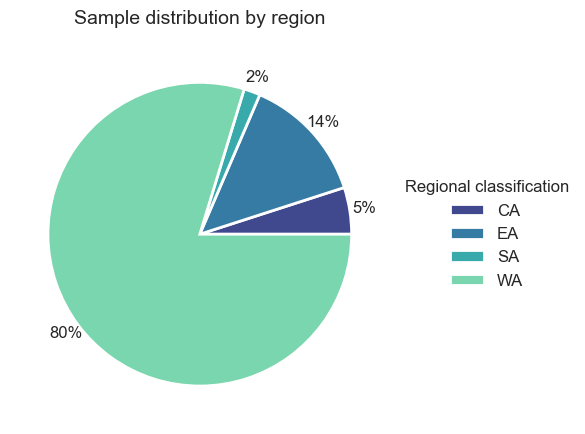

In [14]:
# Create pie chart of sample count per region
color_dict = dict({"SA": "#38AAAC", "EA": "#357BA3", "CA": "#40498E", "WA": "#79D6AE"})

values = grouped_regions.REG.values

fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts = plt.pie(
    data=grouped_regions,
    x="SAMPLE_COUNT",
    colors=[color_dict[key] for key in values],
    autopct="%.0f%%",
    wedgeprops={"linewidth": 2.0, "edgecolor": "white"},
    pctdistance=1.1,
    labeldistance=1.2,
)

ax.legend(
    patches,
    values,
    title="Regional classification",
    fontsize=12,
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)

plt.title("Sample distribution by region", size=constants.BIGGER_FONT, pad=15)
plt.tight_layout()
plt.savefig(
    "..\Results\Figures\Sample_region_proportions.png", dpi=1200, bbox_inches="tight"
)
plt.show()

From the plot above, we can see that Southern Africa (SA) was under-represented in the African genomic data. The majority of the individuals from which genomic data was gathered were from Western Africa (WA).